<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

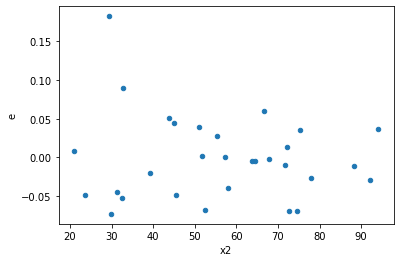

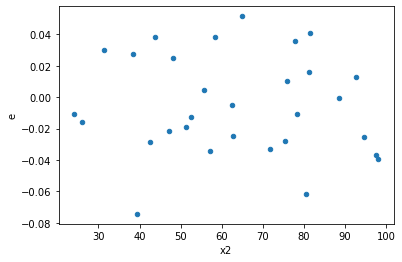

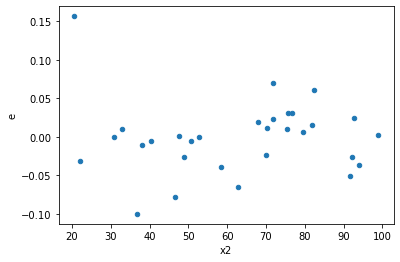

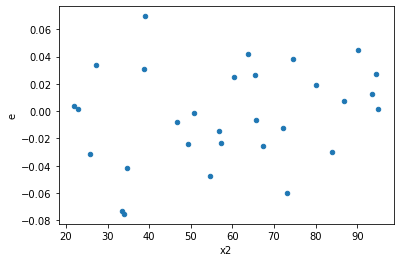

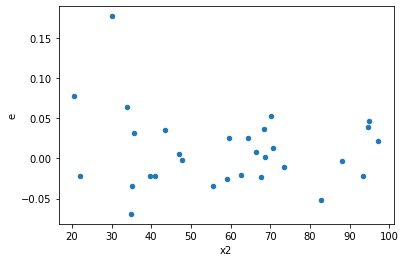

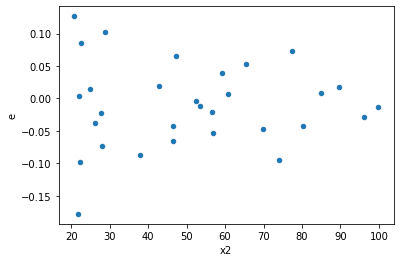

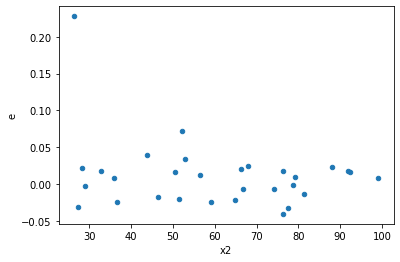

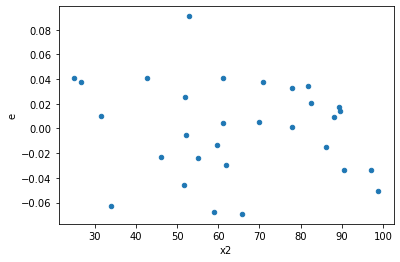

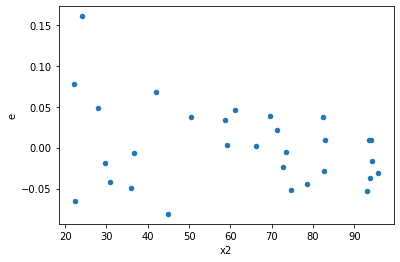

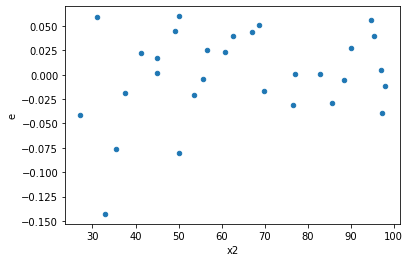

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1

    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
36.0,8.0,8.0,0.012616520377697088,0.018883152719377082,0.001577065047212136,0.0023603940899221353,1.4967005286780863,0.5816314631942663,0.7091842684028669,0.29081573159713314,Reject001=1 : Homoscedasticity
57.0,8.0,8.0,0.01191627265184724,0.012045822036192736,0.001489534081480905,0.001505727754524092,1.0108716364697659,0.9881737803490047,0.5059131098254976,0.49408689017450236,Reject001=1 : Homoscedasticity
86.0,8.0,8.0,0.00703452318352671,0.007164664878671967,0.0008793153979408388,0.0008955831098339959,1.018500428778175,0.9799523012804028,0.5100238493597986,0.4899761506402014,Reject001=1 : Homoscedasticity
89.0,8.0,8.0,0.0028635140892567124,0.012637420812312757,0.00035793926115708905,0.0015796776015390946,4.413256026825793,0.05064777182081159,0.9746761140895942,0.025323885910405797,Reject001=1 : Homoscedasticity
94.0,8.0,8.0,0.007682342867189898,0.010817047926409801,0.0009602928583987373,0.0013521309908012251,1.4080402441562125,0.6397910417630821,0.680104479118459,0.31989552088154105,Reject001=1 : Homoscedasticity
155.0,8.0,8.0,0.004143103388741955,0.006844568827396976,0.0005178879235927444,0.000855571103424622,1.6520391081708719,0.4935227550407497,0.7532386224796251,0.24676137752037486,Reject001=1 : Homoscedasticity
207.0,8.0,8.0,0.009148711720650606,0.013478880559421038,0.0011435889650813257,0.0016848600699276297,1.4733091358640487,0.5963815102860597,0.7018092448569702,0.29819075514302984,Reject001=1 : Homoscedasticity
221.0,8.0,8.0,0.004199573241598465,0.00435245126903019,0.0005249466551998081,0.0005440564086287737,1.0364032292418206,0.9609082226504537,0.5195458886747731,0.48045411132522686,Reject001=1 : Homoscedasticity
234.0,8.0,8.0,0.007248567769814664,0.008167453917622872,0.000906070971226833,0.001020931739702859,1.1267679598216271,0.87007431525818,0.56496284237091,0.43503715762909,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.04839187493767074,0.014523532106267653,0.006048984367208843,0.0018154415132834566,0.30012336006765844,0.10843618127272585,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,0.010080268130789233,0.00521808257707334,0.0012600335163486542,0.0006522603221341675,0.5176531526116053,0.3708334463055433,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,0.020259815933949907,0.0049831648331794326,0.0025324769917437384,0.0006228956041474291,0.2459629865061613,0.0637584052337593,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,0.016789540920174897,0.006589733095132574,0.002098692615021862,0.0008237166368915718,0.39249036804896326,0.2074907230670871,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,0.03735337169997244,0.010998814360342167,0.004669171462496555,0.0013748517950427708,0.29445305362756,0.10323624737734617,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,0.08036538152050442,0.018206936001879694,0.010045672690063052,0.002275867000234962,0.22655197620426126,0.050623555714129645,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.035688563507807164,0.003506804249070429,0.0044610704384758955,0.0004383505311338036,0.09826128889450221,0.003592267735163394,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,0.0222030279103694,0.003377017710893873,0.002775378488796175,0.0004221272138617341,0.1520971700133168,0.015239251271852348,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,0.03154856067947797,0.0055302679366879305,0.003943570084934746,0.0006912834920859913,0.17529382696324766,0.02371588564091096,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      769
Reject001=0 : Heteroscedasticity    231
Name: Result_test, dtype: int64